<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/JOB_A_THON_May_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Data Description
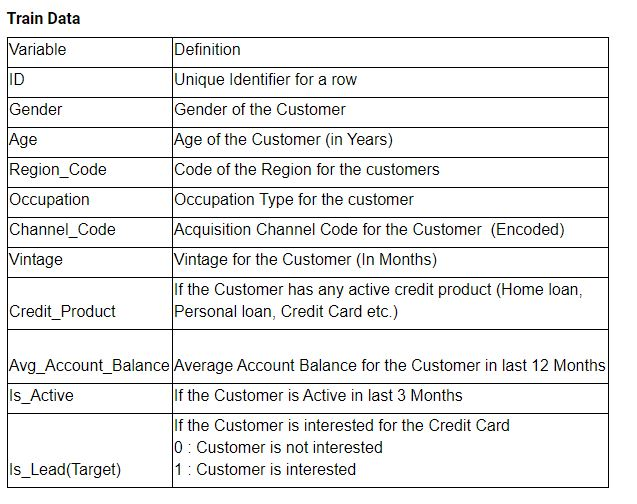

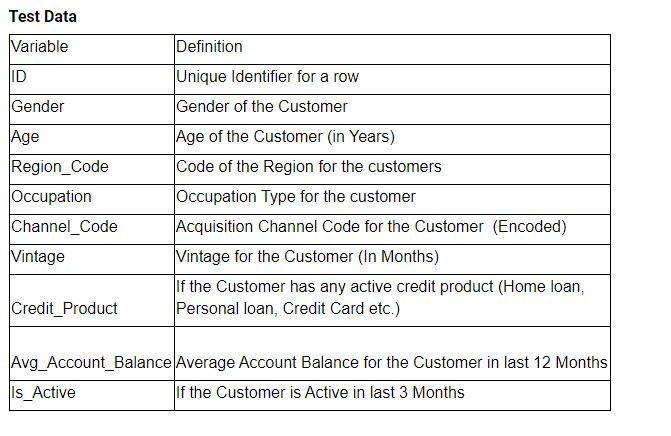

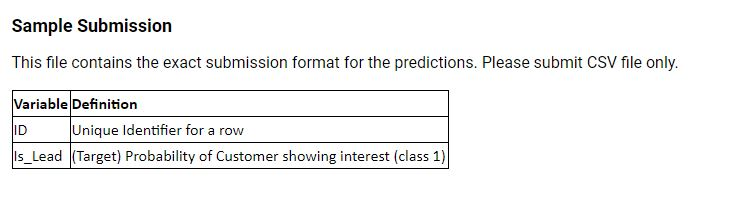

## Evaluation
The evaluation metric for this competition is **roc_auc_score** across all entries in the test set.

## Download Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/train_s3TEQDk.csv")
test_data = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/test_mSzZ8RL.csv")
sub_data = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/sample_submission_eyYijxG.csv")

## Train_Data analysis

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
train_data.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,FENMUVEF,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [ ]:
print(f"Number of training samples :{len(train_data)} and number of attributes {train_data.shape[1]}")

Number of training samples :245725 and number of attributes 11


## Attributes in training and test data having missing data /null  value.

In [ ]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]/len(train_data)

Credit_Product    0.119341
dtype: float64

In [ ]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]/len(test_data)

Credit_Product    0.118904
dtype: float64

* Credit_Product attribute has missing values

## Train Data 

In [ ]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Separate Categorical Attributes

In [ ]:
cat_cols = [ col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_cols

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

## Separate Numerical Attributes

In [ ]:
num_cols = [ col for col in train_data.columns if train_data[col].dtypes != 'O']
num_cols

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']

In [ ]:
train_data[num_cols].describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [ ]:
test_data[['Age','Vintage','Avg_Account_Balance']].describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


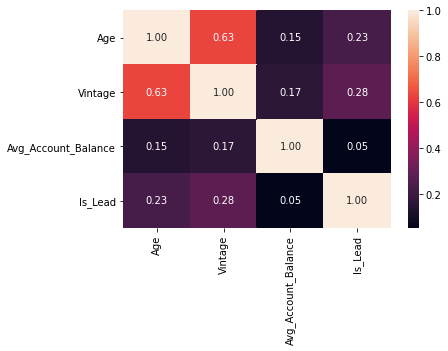

In [ ]:
data_corr = train_data[num_cols].corr()
sns.heatmap(data_corr,annot = True,fmt=".2f")

# Binning the Age feature

In [ ]:
 bin_labels_5 = ['Late_20', 'Late_30', 'Late_40', 'Late_50', 'Late_80']
 train_data['Age_Bucket'] = pd.qcut(train_data['Age'], q=[0, .2, .4, .6, .8, 1],labels=bin_labels_5)

In [ ]:
train_data['Age_Bucket'].value_counts()

Late_20    57074
Late_80    48902
Late_50    48763
Late_40    48747
Late_30    42239
Name: Age_Bucket, dtype: int64

In [ ]:
test_data['Age_Bucket']= pd.qcut(test_data['Age'], q=[0, .2, .4, .6, .8, 1],labels=bin_labels_5)

In [ ]:
test_data['Age_Bucket'].value_counts()

Late_20    24618
Late_40    20963
Late_50    20889
Late_80    20840
Late_30    18002
Name: Age_Bucket, dtype: int64

## Unique values

In [ ]:
for col in cat_cols:
  print(f"The # of unique values for {col} = {train_data[col].nunique()}")

The # of unique values for ID = 245725
The # of unique values for Gender = 2
The # of unique values for Region_Code = 35
The # of unique values for Occupation = 4
The # of unique values for Channel_Code = 4
The # of unique values for Credit_Product = 2
The # of unique values for Is_Active = 2


## % of unique values

In [ ]:
for col in cat_cols:
  print(f"The % of unique values for {col} = {train_data[col].nunique()/len(train_data) * 100.0}% ")

The % of unique values for ID = 100.0% 
The % of unique values for Gender = 0.0008139179977617255% 
The % of unique values for Region_Code = 0.014243564960830197% 
The % of unique values for Occupation = 0.001627835995523451% 
The % of unique values for Channel_Code = 0.001627835995523451% 
The % of unique values for Credit_Product = 0.0008139179977617255% 
The % of unique values for Is_Active = 0.0008139179977617255% 


## Visualize Target values

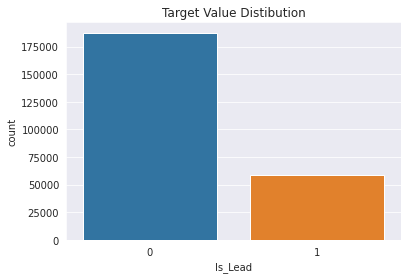

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Is_Lead',data=train_data)
plt.title('Target Value Distibution')
plt.show()

* here the proportion data for customers interested (1) for a lead is less compared to customers not interested(0)
* Datset is imbalanced

## Visualize distribution of categorical features with respect to target variable

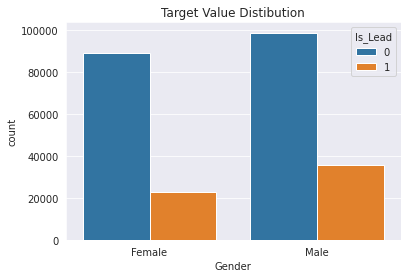

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution')
plt.show()

* More Males are interested for a lead compared to female

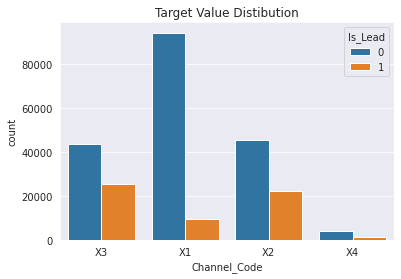

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Channel_Code',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution')
plt.show()

* Credit Cards coming via channel X3 and X2 have more likely changes of being converted into a lead

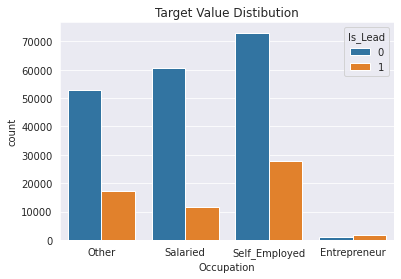

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Occupation',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution')
plt.show()

* Self employed and Enterpreneur are more likely to being converted into a lead

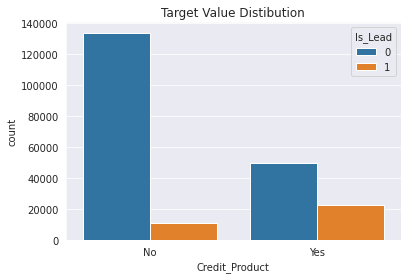

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Credit_Product',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution')
plt.show()

In [ ]:
train_data['Region_Code'].value_counts(normalize=True)

RG268    0.146237
RG283    0.119711
RG254    0.109228
RG284    0.078624
RG277    0.052197
RG280    0.051989
RG269    0.031999
RG270    0.031417
RG261    0.031063
RG257    0.024829
RG251    0.024214
RG282    0.023722
RG274    0.021512
RG272    0.021373
RG281    0.020726
RG273    0.018301
RG252    0.017442
RG279    0.016181
RG263    0.015005
RG275    0.013206
RG260    0.012656
RG256    0.011586
RG264    0.011366
RG276    0.011248
RG259    0.010524
RG250    0.010158
RG255    0.008212
RG258    0.007940
RG253    0.007561
RG278    0.007415
RG262    0.007276
RG266    0.006422
RG265    0.006292
RG271    0.006275
RG267    0.006092
Name: Region_Code, dtype: float64

## Region Code Analysis

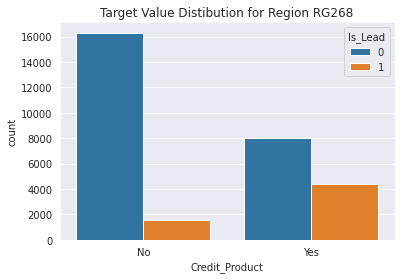

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Credit_Product',data=train_data[train_data['Region_Code'] == 'RG268'],hue='Is_Lead')
plt.title('Target Value Distibution for Region RG268')
plt.show()

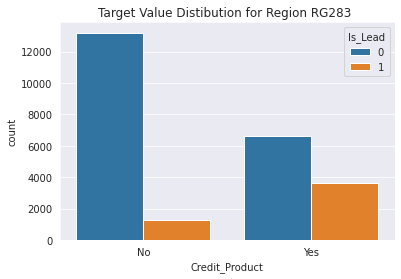

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Credit_Product',data=train_data[train_data['Region_Code'] == 'RG283'],hue='Is_Lead')
plt.title('Target Value Distibution for Region RG283 ')
plt.show()

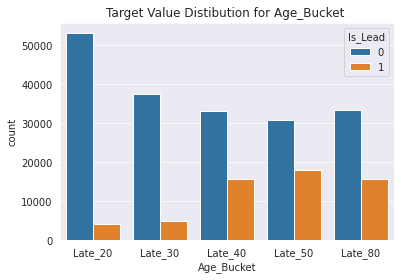

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Age_Bucket',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution for Age_Bucket ')
plt.show()

* As seen above as people in their late 40s, 50s and 80s have greater affinity for geting converted into a Lead

## Proportion of missing Data

In [ ]:
train_data['Credit_Product'].value_counts( dropna=False)/len(train_data)

No     0.587474
Yes    0.293185
NaN    0.119341
Name: Credit_Product, dtype: float64

In [ ]:
test_data['Credit_Product'].value_counts( dropna=False)/len(test_data)

No     0.585005
Yes    0.296092
NaN    0.118904
Name: Credit_Product, dtype: float64

## Imputing missing values in Train and Test

In [ ]:
train_data['Credit_Product'] = train_data['Credit_Product'].fillna('No_Info')
test_data['Credit_Product'] = test_data['Credit_Product'].fillna('No_Info')

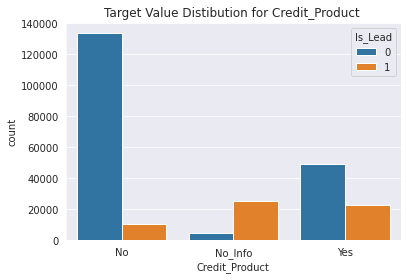

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Credit_Product',data=train_data,hue='Is_Lead')
plt.title('Target Value Distibution for Credit_Product ')
plt.show()

## Separate Target variable and independent features

In [ ]:
X = train_data.drop(['ID','Is_Lead','Age'],axis=1)
Y = train_data['Is_Lead']

In [ ]:
X.head()

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_Bucket
0,Female,RG268,Other,X3,43,No,1045696,No,Late_80
1,Female,RG277,Salaried,X1,32,No,581988,No,Late_30
2,Female,RG268,Self_Employed,X3,26,No,1484315,Yes,Late_50
3,Male,RG270,Salaried,X1,19,No,470454,No,Late_30
4,Female,RG282,Salaried,X1,33,No,886787,No,Late_30


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               245725 non-null  object  
 1   Region_Code          245725 non-null  object  
 2   Occupation           245725 non-null  object  
 3   Channel_Code         245725 non-null  object  
 4   Vintage              245725 non-null  int64   
 5   Credit_Product       245725 non-null  object  
 6   Avg_Account_Balance  245725 non-null  int64   
 7   Is_Active            245725 non-null  object  
 8   Age_Bucket           245725 non-null  category
dtypes: category(1), int64(2), object(6)
memory usage: 15.2+ MB


In [ ]:
new_cat_cols = [col for col in X.columns if X[col].dtypes == 'O']
new_cat_cols

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [ ]:
X[new_cat_cols] =X[new_cat_cols].astype('category')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               245725 non-null  category
 1   Region_Code          245725 non-null  category
 2   Occupation           245725 non-null  category
 3   Channel_Code         245725 non-null  category
 4   Vintage              245725 non-null  int64   
 5   Credit_Product       245725 non-null  category
 6   Avg_Account_Balance  245725 non-null  int64   
 7   Is_Active            245725 non-null  category
 8   Age_Bucket           245725 non-null  category
dtypes: category(7), int64(2)
memory usage: 5.4 MB


In [ ]:
cat_cols_x = [col for col in X.columns if X[col].dtypes !='int64']
cat_cols_x

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active',
 'Age_Bucket']

## Install Catboost model

In [ ]:
%%capture
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

## Hyperparameter optimization using hperopt

In [60]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial

In [61]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = CatBoostClassifier(**params,eval_metric='AUC',auto_class_weights='Balanced',num_boost_round=1000,random_state =42)
  #model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x.iloc[train_idx],x.iloc[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain,cat_features=cat_cols_x)
    #model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

## Parameter space for CatBoostClassifier

In [62]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.quniform("max_depth", 3, 15, 2)),
#CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.
#"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"learning_rate": hp.loguniform('learning_rate', -5.0, -2),
# uniform chooses a value between two values
#"random_state": scope.int(hp.quniform("random_state", 40, 100,10)),
#"num_boost_round": scope.int(hp.quniform("num_boost_round", 1000, 10000,10))
}

## HyperParameter optimization using hyperopt

In [63]:
# partial function
optimization_function = partial(optimize,x=X,y=Y)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

Streaming output truncated to the last 5000 lines.

775:	total: 15m 27s	remaining: 4m 27s

776:	total: 15m 28s	remaining: 4m 26s

777:	total: 15m 28s	remaining: 4m 24s

778:	total: 15m 29s	remaining: 4m 23s

779:	total: 15m 31s	remaining: 4m 22s

780:	total: 15m 33s	remaining: 4m 21s

781:	total: 15m 34s	remaining: 4m 20s

782:	total: 15m 36s	remaining: 4m 19s

783:	total: 15m 36s	remaining: 4m 18s

784:	total: 15m 38s	remaining: 4m 16s

785:	total: 15m 39s	remaining: 4m 15s

786:	total: 15m 41s	remaining: 4m 14s

787:	total: 15m 43s	remaining: 4m 13s

788:	total: 15m 43s	remaining: 4m 12s

789:	total: 15m 45s	remaining: 4m 11s

790:	total: 15m 46s	remaining: 4m 10s

791:	total: 15m 46s	remaining: 4m 8s

792:	total: 15m 47s	remaining: 4m 7s

793:	total: 15m 48s	remaining: 4m 6s

794:	total: 15m 50s	remaining: 4m 5s

795:	total: 15m 52s	remaining: 4m 4s

796:	total: 15m 53s	remaining: 4m 2s

797:	total: 15m 55s	remaining: 4m 1s

798:	total: 15m 55s	remaining: 4m

799:	total: 15m 57s	rem

KeyboardInterrupt: ignored

In [64]:
print(f" parameters for CatBoostClassifier {hopt}")

NameError: ignored

## Applying Startified KFold prediction based on the hyperparameters obtained by hyperopt

Running 1 iteration
0.87269639373215
0.8728374624211377
Running 2 iteration
0.8720983826491652
0.8732032842413796
Running 3 iteration
0.8743926023380284
0.8715050588672121
Running 4 iteration
0.8729774472308115
0.8719222657811128
Running 5 iteration
0.8722468564860274
0.8731499048719856
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.8715050588672121 0.8743926023380284 0.872702965861901


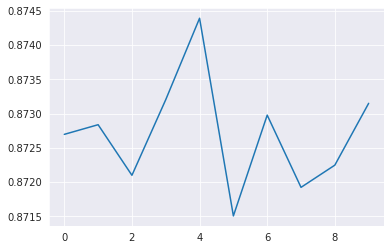

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_cols_x)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

Running 1 iteration
0.874571968629908
0.8708185319167038
Running 2 iteration
0.874403676912273
0.8712263642335419
Running 3 iteration
0.8729535623084335
0.8719173692428932
Running 4 iteration
0.8702016233285456
0.8750040011827377
Running 5 iteration
0.8731678622854907
0.8721717150036732
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.8702016233285456 0.8750040011827377 0.87264366750442


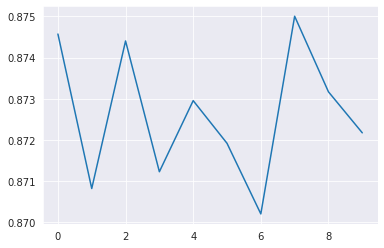

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=5,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_cols_x)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [120]:
model  = model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1500,verbose=0)
model.fit(X_train,y_train,cat_features = cat_cols_x)

## Validation Accuracy

In [81]:
y_pred = model.predict(X_test)

* max_depth = 3, num_rounds =1000

In [72]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8748875105101662


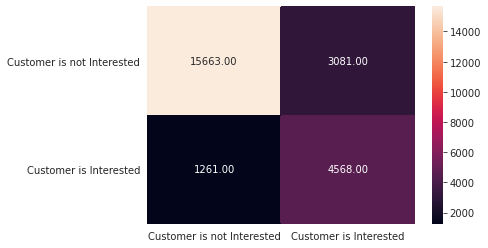

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Customer is not Interested','Customer is Interested'],yticklabels=['Customer is not Interested','Customer is Interested'])

In [70]:
accuracy_score(y_test,y_pred)

0.8233019981280267

* max_depth = 3, num_rounds =500

In [99]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8746868454385766


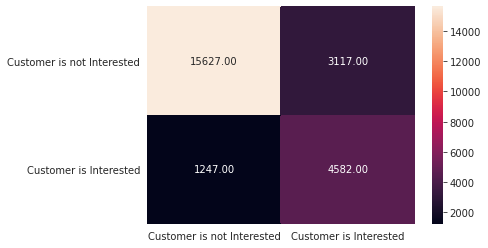

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
y_pred = model.predict(X_test)
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Customer is not Interested','Customer is Interested'],yticklabels=['Customer is not Interested','Customer is Interested'])

* max_depth = 3, num_rounds =1500

In [121]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8748937472441505


* max_depth = 3, num_rounds =2000

In [107]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8749681324110281


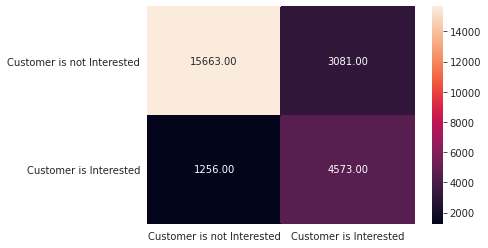

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
y_pred = model.predict(X_test)
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Customer is not Interested','Customer is Interested'],yticklabels=['Customer is not Interested','Customer is Interested'])

* max_depth = 3, num_rounds =3000

In [114]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8750000805472117


* max_depth = 8, num_rounds =1000

In [92]:
y_pred = model.predict(X_test)

In [90]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8920877823048694


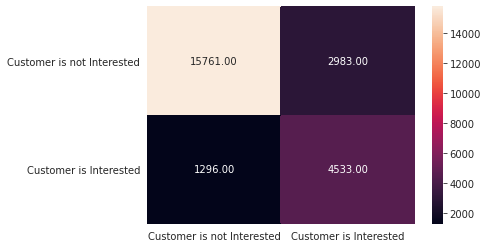

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Customer is not Interested','Customer is Interested'],yticklabels=['Customer is not Interested','Customer is Interested'])

* max_depth = 6, num_rounds =6000

In [82]:
preds = model.predict_proba(xtest)[:,1]
print(roc_auc_score(ytest,preds))

0.8825064368425477


In [84]:
accuracy_score(y_test,y_pred)

0.8227729621942783

## Confusion Matrix

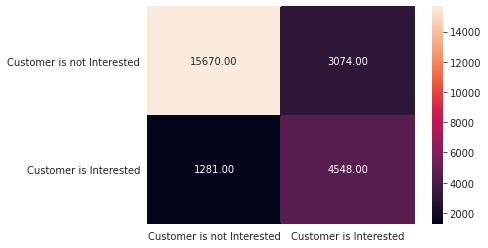

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Customer is not Interested','Customer is Interested'],yticklabels=['Customer is not Interested','Customer is Interested'])

## Prediction on Test Data

In [71]:
testdata = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/test_mSzZ8RL.csv")

In [122]:
test_new = test_data[X.columns]
y_pred = model.predict_proba(test_new)

In [124]:
testdata['Is_Lead'] = y_pred[:,1]

In [125]:
testdata[sub_data.columns].head()

,ID,Is_Lead
0,VBENBARO,0.112534
1,CCMEWNKY,0.936004
2,VK3KGA9M,0.186845
3,TT8RPZVC,0.070848
4,SHQZEYTZ,0.062796


## Submit predictions for Class 1

In [126]:
testdata[sub_data.columns].to_csv("catboost_hyperopt_boost_1500_max_depth_3.csv",index=False)

##Scores

* Your score for this submission is : 0.8718577473428734.(boost_1000_max_depth_3)

* Your score for this submission is : 0.8718419664290017.((boost_6000_max_depth_6)
* Your score for this submission is : 0.8717040550846697.(boost_500_max_depth_3)
*Your score for this submission is : 0.8720982180158834.(boost_2000_max_depth_3)

*Your score for this submission is : 0.8720048365344834.(boost_1500_max_depth_3)

* Your score for this submission is : 0.8720041637692079.(boost_3000_max_depth_3)

* Your score for this submission is : 0.8696856152916855.((boost_1000_max_depth_8)
